In [34]:
import numpy as np
import matplotlib.pyplot as plt
import keras


In [63]:
def sigmoid(x, a):
    return 1/(1+np.exp(-a*x))

def true_f(x1,x2):
    a = x1*x2
    return 1 if a < 0 else 0

def true_f2(x1,x2): # works with meshgrid output
    a = x1*x2
    b1 = a < 0
    b2 = a >= 0
    a[b1] = 1
    a[b2] = 0
    return a


In [93]:
bias_initializer=keras.initializers.RandomUniform(minval=0, maxval=1)
kernel_initializer=keras.initializers.RandomUniform(minval=0, maxval=1)

# 5 hidden layers with 3 neurons each
model = keras.Sequential([
    keras.Input((2,)),
    keras.layers.Dense(units=3, activation='relu', bias_initializer=bias_initializer, kernel_initializer=kernel_initializer),
    keras.layers.Dense(units=3, activation='relu', bias_initializer=bias_initializer, kernel_initializer=kernel_initializer),
    keras.layers.Dense(units=3, activation='relu', bias_initializer=bias_initializer, kernel_initializer=kernel_initializer),
    keras.layers.Dense(units=3, activation='relu', bias_initializer=bias_initializer, kernel_initializer=kernel_initializer),
    keras.layers.Dense(units=3, activation='relu', bias_initializer=bias_initializer, kernel_initializer=kernel_initializer),
    keras.layers.Dense(units=1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [94]:
n = 500
X = np.random.uniform(-1,1, (n,2))
y = np.zeros(n)
for i in range(n):
    y[i] = true_f(X[i][0],X[i][1])

model.fit(X, y, epochs=1000, verbose=0)
_, acc = model.evaluate(X, y)
print(f'Accuracy: {acc*100:.2f}%')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8385 - loss: 0.3480 
Accuracy: 81.80%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step


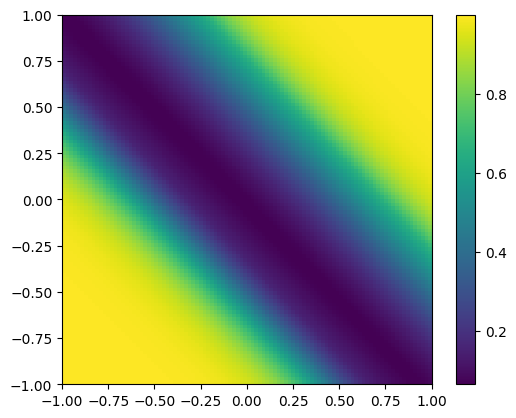

In [95]:
def true_f2(x1,x2):
    a = x1*x2
    b1 = a < 0
    b2 = a >= 0
    a[b1] = 1
    a[b2] = 0
    return a

n = 100
x1 = np.linspace(-1,1, n)
x2 = np.linspace(-1,1, n)
X1, X2 = np.meshgrid(x1, x2)
coords = np.vstack([X1.ravel(), X2.ravel()]).T
#print(true_f2(X1,X2))
predictions = model.predict(coords)
predictions = predictions.reshape((n,n))
plt.imshow(predictions, extent=(-1,1,-1,1))
plt.colorbar()
plt.show()